## Reference 

https://financedata.github.io/posts/matplotlib-hangul-for-osx.html

# Python info check 

In [7]:
import platform
print(f"Platform is {platform.platform()}")

import sys
print(f"Version of python is {sys.version_info}")

import matplotlib

print ('matplotlib 정보-------------')
print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

Platform is Linux-5.15.40-0-virt-aarch64-with-glibc2.31
Version of python is sys.version_info(major=3, minor=10, micro=5, releaselevel='final', serial=0)
matplotlib 정보-------------
버전:  3.5.2
설치위치:  /opt/conda/lib/python3.10/site-packages/matplotlib/__init__.py
설정:  /home/jovyan/.config/matplotlib
캐시:  /home/jovyan/.cache/matplotlib


# Example for wrong behavior

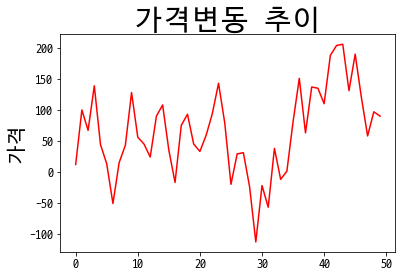

In [8]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

import matplotlib.pyplot as plt

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이')
plt.ylabel('가격')
plt.show()

# Finding info for font directory

- 폰트가 어느 위치에 있는지 파악한다. 
- 콘테이너 이미지를 통해서 OS 상에 한글 폰트가 심었다. 이게 어디 심어졌는지를 파악하는 과정 

In [9]:
import matplotlib
import matplotlib.font_manager

#[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'D2' in f.name]
#[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['D2Coding']

# Method 1: set font env per figure 

- 폰트의 위치와 여러가지 속성을 지정하고 해당 개체에 바로 부여하는 방식

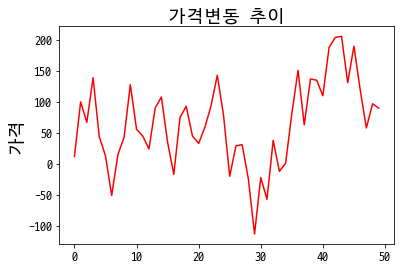

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/naver-d2coding/D2Coding-Ver1.3.2-20180524-all.ttc'
#path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.show()

# Method 2: set font env globally 

- 전체 속성을 부여함 
- 마이너스 부호가 깨지지 않게 만들기 위해 필요한 옵션 

`plt.rcParams['axes.unicode_minus'] = False` 

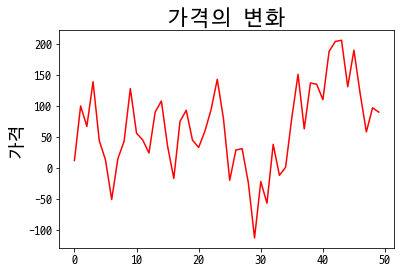

In [15]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'D2Coding'
plt.rcParams['font.size'] = 18.
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.labelsize'] = 10.
plt.rcParams['axes.unicode_minus'] = False

plt.title('가격의 변화')
plt.ylabel('가격', fontproperties=fontprop)
plt.plot(range(50), data, 'r')
plt.show()